### Importieren der Daten, sowie Funktionen, die im Folgenden benutzt werden

In [6]:
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir("C:/Users/claud/OneDrive/Escritorio/Praktikum_Python/Alanin")
Daten = np.loadtxt("Alanin.dpt")

Intensitaet = np.ones(100)
Maske = np.zeros(100)
Summe = np.zeros(len(y1))
AnzahlArrays = 0

### Baseline-Korrektur.mit einer linearen Funktion die später vom Graphen subtrahiert wird


In [7]:
def baseLine(D, y):
    x = D[:,0]
    y1 = D[:,y]
    Parameter = np.polyfit([x[1786],x[2067]], [y1[1786], y1[2067]], 1)
    Steigung = Parameter[0]
    Achsenabschnitt = Parameter[1]
    NullGerade = Steigung*x+Achsenabschnitt
    return (NullGerade)

### Maskierungsschleife, damit die schwachen Spektren nicht erscheinen

In [8]:
for i in range(1,101):
    y1 = Daten[:,i]
    y1 = y1-baseLine(Daten,i)
    Intensitaet[i-1]= y1[1836]
    if Intensitaet[i-1]<0.0075:
        Maske[i-1]=True
    else:
        #Wenn das Spektrum nicht zu schwach ist, soll es für den Durchschnitt respektiert werden und zwar gewichtet, d.h mit der
        #Intensität multipliziert, damit stärkere Spektren mehr einfliessen als schächere.
        Summe = Summe + y1*Intensitaet[i-1]

### Vier Graphen anzeigen

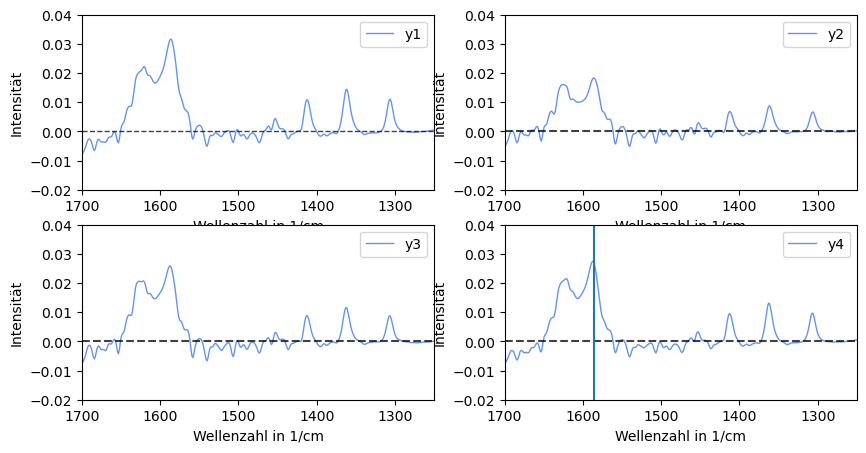

In [5]:
np.shape(Daten)
x = Daten[:,0]
y1 = Daten[:,50]
y2 = Daten[:,35]
y3 = Daten[:,43]
y4 = Daten[:,58]

plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.plot(x,y1-baseLine(Daten,50), c="cornflowerblue", lw=1, ls="solid", label="y1")
plt.xlim(1700,1250)
plt.ylim(-0.02,0.04)
plt.xlabel("Wellenzahl in 1/cm")
plt.ylabel("Intensität")
plt.legend()
plt.axhline(0, lw = 1, ls="dashed", alpha=0.75,color="black")
#plt.savefig("Alanin_Spektrum.png")

plt.subplot(2,2,2)
plt.plot(x,y2-baseLine(Daten,35), c="cornflowerblue", lw=1, ls="solid", label="y2")
plt.xlim(1700,1250)
plt.ylim(-0.02,0.04)
plt.xlabel("Wellenzahl in 1/cm")
plt.ylabel("Intensität")
plt.legend()
plt.axhline(0, ls="dashed", alpha=0.75,color="black")

plt.subplot(2,2,3)
plt.plot(x,y3-baseLine(Daten,43), c="cornflowerblue", lw=1, ls="solid", label="y3")
plt.xlim(1700,1250)
plt.ylim(-0.02,0.04)
plt.xlabel("Wellenzahl in 1/cm")
plt.ylabel("Intensität")
plt.legend()
plt.axhline(0, ls="dashed", alpha=0.75,color="black")

plt.subplot(2,2,4)
plt.plot(x,y4-baseLine(Daten,58), c="cornflowerblue", lw=1, ls="solid", label="y4")
plt.xlim(1700,1250)
plt.ylim(-0.02,0.04)
plt.xlabel("Wellenzahl in 1/cm")
plt.ylabel("Intensität")
plt.legend()
plt.axhline(0, ls="dashed", alpha=0.75,color="black")
plt.axvline(1586)

### Endergebnis

C:\Users\claud\AppData\Local\Temp\ipykernel_22988\3350225390.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax = sns.heatmap(final_result, annot=False, linecolor='black',annot_kws={"size": 12} ,mask = Maske, linewidth = 0.5 , cbar=True, cmap=plt.cm.get_cmap('Wistia', 20))


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, '0'),
  Text(1.5, 0, '1'),
  Text(2.5, 0, '2'),
  Text(3.5, 0, '3'),
  Text(4.5, 0, '4'),
  Text(5.5, 0, '5'),
  Text(6.5, 0, '6'),
  Text(7.5, 0, '7'),
  Text(8.5, 0, '8'),
  Text(9.5, 0, '9')])

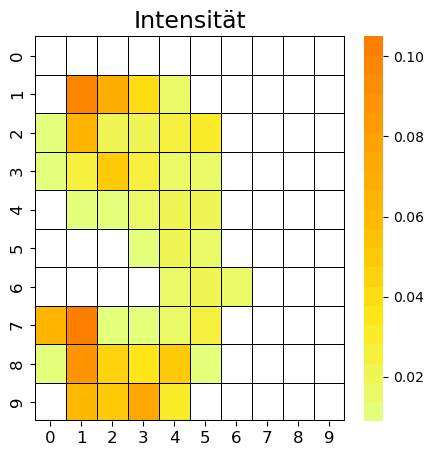

In [9]:
final_result = np.stack(np.array_split(Intensitaet, 10), axis=-1)
Maske = np.stack(np.array_split(Maske, 10), axis=-1)
np.shape(final_result)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(final_result, annot=False, linecolor='black',annot_kws={"size": 12} ,mask = Maske, linewidth = 0.5 , cbar=True, cmap=plt.cm.get_cmap('Wistia', 20))
plt.axhline(y=10,c="black")
plt.axvline(x=10,c="black")
plt.title( "Intensität",fontsize =17)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
#plt.savefig("Alanin_Intensitaet.png")

### Durchschnittsspektrum, man nimmt die Summe aller Spektren mal deren Intensität, damit stärkere mehr einfliessen als schwächere und man teilt durch die Summe der Intensitäten.

(array([1250., 1300., 1350., 1400., 1450., 1500., 1550., 1600., 1650.]),
 [Text(1250.0, 0, '1250'),
  Text(1300.0, 0, '1300'),
  Text(1350.0, 0, '1350'),
  Text(1400.0, 0, '1400'),
  Text(1450.0, 0, '1450'),
  Text(1500.0, 0, '1500'),
  Text(1550.0, 0, '1550'),
  Text(1600.0, 0, '1600'),
  Text(1650.0, 0, '1650')])

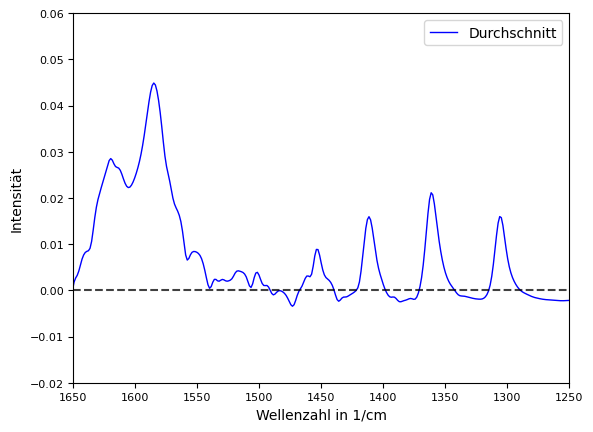

In [11]:
Durchschnitt = Summe/np.sum(Intensitaet)
DurchschnittDaten = np.column_stack((Daten[:,0], Durchschnitt))

plt.figure()
plt.plot(x,Durchschnitt-baseLine(DurchschnittDaten, 1), c="blue", lw=1, ls="solid", label="Durchschnitt")
plt.xlim(1650,1250)
plt.ylim(-0.02,0.06)
plt.xlabel("Wellenzahl in 1/cm", fontsize = 10)
plt.ylabel("Intensität", fontsize = 10)
plt.legend()
plt.axhline(0, ls="dashed", alpha=0.75,color="black")
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)

### Vergleich von drei Spektren mit wenig, mittel und viel Intensität

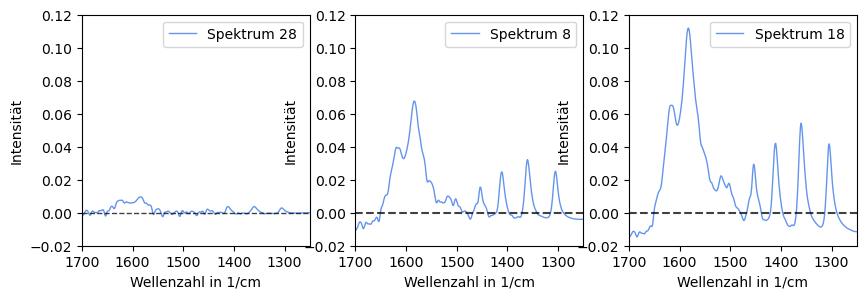

In [12]:
plt.figure(figsize=(10,3))
yNichts = 28
yEtwas = 8
yViel = 18
yNichtsD = Daten[:,yNichts]
yEtwasD = Daten[:,yEtwas]
yVielD = Daten[:,yViel]
y91 = Daten[:,91]

plt.subplot(1,3,1)
plt.plot(x,yNichtsD-baseLine(Daten,yNichts), c="cornflowerblue", lw=1, ls="solid", label="Spektrum 28")
plt.xlim(1700,1250)
plt.ylim(-0.02,0.12)
plt.xlabel("Wellenzahl in 1/cm")
plt.ylabel("Intensität")
plt.legend()
plt.axhline(0, lw = 1, ls="dashed", alpha=0.75,color="black")
#plt.savefig("Alanin_Spektrum.png")

plt.subplot(1,3,2)
plt.plot(x,yEtwasD-baseLine(Daten, yEtwas), c="cornflowerblue", lw=1, ls="solid", label="Spektrum 8")
plt.xlim(1700,1250)
plt.ylim(-0.02,0.12)
plt.xlabel("Wellenzahl in 1/cm")
plt.ylabel("Intensität")
plt.legend()
plt.axhline(0, ls="dashed", alpha=0.75,color="black")

plt.subplot(1,3,3)
plt.plot(x,yVielD-baseLine(Daten, yViel), c="cornflowerblue", lw=1, ls="solid", label="Spektrum 18")
plt.xlim(1700,1250)
plt.ylim(-0.02,0.12)
plt.xlabel("Wellenzahl in 1/cm")
plt.ylabel("Intensität")
plt.legend()
plt.axhline(0, ls="dashed", alpha=0.75,color="black")



### Höchster Peak um mittlere Peak Position zu identifizieren

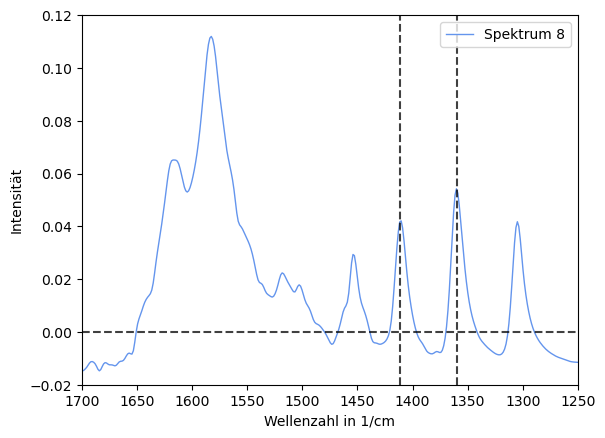

In [13]:
y = 18
yDaten = yNichtsD = Daten[:, y]
plt.plot(x,yDaten-baseLine(Daten, y), c="cornflowerblue", lw=1, ls="solid", label="Spektrum 8")
plt.xlim(1700,1250)
plt.ylim(-0.02,0.12)
plt.xlabel("Wellenzahl in 1/cm")
plt.ylabel("Intensität")
plt.legend(loc=1)
plt.axhline(0, ls="dashed", alpha=0.75,color="black")
plt.axvline(1411, ls="dashed", alpha=0.75,color="black")
plt.axvline(1360, ls="dashed", alpha=0.75,color="black")
#x1 = 1411
#x2 = 1360

### Quotient zwischen den mittleren Peaks

C:\Users\claud\AppData\Local\Temp\ipykernel_22988\2980429272.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax = sns.heatmap(final_result, annot=False, linecolor='black',annot_kws={"size": 12} ,mask = Maske, linewidth = 0.5 , cbar=True, cmap=plt.cm.get_cmap('Wistia', 20))


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, '0'),
  Text(1.5, 0, '1'),
  Text(2.5, 0, '2'),
  Text(3.5, 0, '3'),
  Text(4.5, 0, '4'),
  Text(5.5, 0, '5'),
  Text(6.5, 0, '6'),
  Text(7.5, 0, '7'),
  Text(8.5, 0, '8'),
  Text(9.5, 0, '9')])

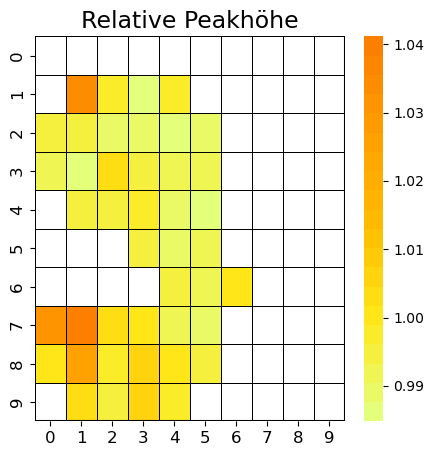

In [14]:
Quotient = np.zeros(100)

for i in range(1,101):
    y1 = Daten[:,i]
    y1 = y1-baseLine(Daten,i)
    P1 = Daten[1411, i]
    P2 = Daten[1360, i]
    
    Quotient[i-1]= (P2/P1)

final_result = np.stack(np.array_split(Quotient, 10), axis=-1)
np.shape(final_result)
plt.figure(figsize = (5, 5))
ax = sns.heatmap(final_result, annot=False, linecolor='black',annot_kws={"size": 12} ,mask = Maske, linewidth = 0.5 , cbar=True, cmap=plt.cm.get_cmap('Wistia', 20))
plt.axhline(y=10,c="black")
plt.axvline(x=10,c="black")
plt.title( "Relative Peakhöhe",fontsize =17)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)


### Vergleich Quotient der Peakhöhe und Intensität der Spektren

C:\Users\claud\AppData\Local\Temp\ipykernel_22988\273260841.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax = sns.heatmap(final_result, annot=False, linecolor='black',annot_kws={"size": 12} ,mask = Maske, linewidth = 0.5 , cbar=True, cmap=plt.cm.get_cmap('summer', 20))
C:\Users\claud\AppData\Local\Temp\ipykernel_22988\273260841.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax = sns.heatmap(final_result, annot=False, linecolor='black',annot_kws={"size": 12}, mask = Maske, linewidth = 0.5 , cbar=True, cmap=plt.cm.get_cmap('Wistia', 20))


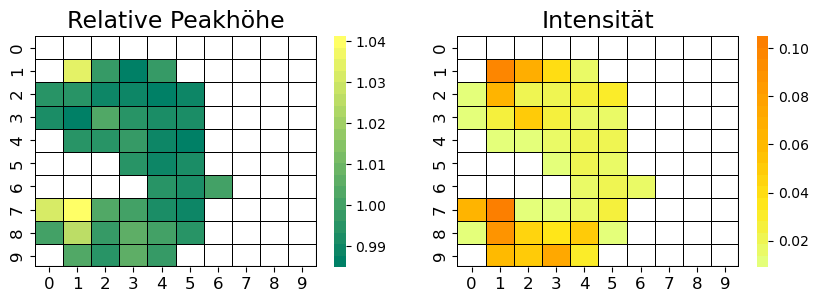

In [15]:
plt.figure(figsize=(10,3))
for i in range(1,101):
    y1 = Daten[:,i]
    y1 = y1-baseLine(Daten,i)
    P1 = Daten[1411, i]
    P2 = Daten[1360, i]
    
    Quotient[i-1]= (P2/P1)

final_result = np.stack(np.array_split(Quotient, 10), axis=-1)
np.shape(final_result)
plt.subplot(1,2,1)
ax = sns.heatmap(final_result, annot=False, linecolor='black',annot_kws={"size": 12} ,mask = Maske, linewidth = 0.5 , cbar=True, cmap=plt.cm.get_cmap('summer', 20))
plt.axhline(y=10,c="black")
plt.axvline(x=10,c="black")
plt.title( "Relative Peakhöhe",fontsize =17)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

for i in range(1,101):
    y1 = Daten[:,i]
    y1 = y1-baseLine(Daten,i)
    Intensitaet[i-1]= y1[1836]


final_result = np.stack(np.array_split(Intensitaet, 10), axis=-1)
np.shape(final_result)
plt.subplot(1,2,2)
ax = sns.heatmap(final_result, annot=False, linecolor='black',annot_kws={"size": 12}, mask = Maske, linewidth = 0.5 , cbar=True, cmap=plt.cm.get_cmap('Wistia', 20))
plt.axhline(y=10,c="black")
plt.axvline(x=10,c="black")
plt.title( "Intensität",fontsize =17)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.savefig("Peak_Intensitaet.png")

### Vergleich von Durchschnittsspektrum und intensivstes Spektrum

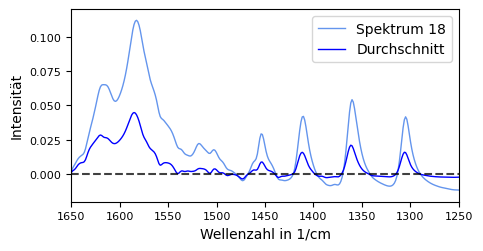

In [16]:
plt.figure(figsize=(5,2.5))
plt.plot(x,yVielD-baseLine(Daten, yViel), c="cornflowerblue", lw=1, ls="solid", label="Spektrum 18")
plt.plot(x,Durchschnitt-baseLine(DurchschnittDaten, 1), c="blue", lw=1, ls="solid", label="Durchschnitt")
plt.xlim(1650,1250)
plt.ylim(-0.02,0.12)
plt.xlabel("Wellenzahl in 1/cm", fontsize = 10)
plt.ylabel("Intensität", fontsize = 10)
plt.legend()
plt.axhline(0, ls="dashed", alpha=0.75,color="black")
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.savefig("Alanin.png", bbox_inches="tight")

### Hochpunkte und Stellensuche für die Baseline-Korrektur

In [17]:
np.where(x>1650)
x[1786]
np.where(x<1290)
x[2067]
np.where(x>1586)
x[1836]

1586.4690568977